In [1]:
import torch
from langdiff31 import loss_test, noise

In [2]:
dataset = torch.rand((10, 57))
bones = torch.tensor([[0,1],[1,2],[2,4],[5,6]])

In [3]:
#langdiff.train_net(dataset, bones)

# Defining plotting functions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# list of pairs of joint indices defining skeleton bones
bones_ls = [
    (0, 1),
    (1, 2),
    (1, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (1, 7),
    (7, 8),
    (8, 9),
    (9, 10),
    (0, 11),
    (11, 12),
    (12, 13),
    (13, 14),
    (0, 15),
    (15, 16),
    (16, 17),
    (17, 18),
]

bones_tensor =torch.tensor([[0,1],[1,2],[1,3],[3,4],[4,5],[5,6],[1,7],[7,8],[8,9],[9,10],[0,11],[11,12],[12,13],[13,14],[0,15],[15,16],[16,17],[17,18]])


def plot_3d_pose(joints_3d, fig_size=(8, 8),
                 col=['b', 'g', 'r', 'c', 'm', 'y', 'k']):
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111, projection='3d')
    if joints_3d.ndim == 2:
        joints_3d = joints_3d[None, :, :]
    for k, j3d in enumerate(joints_3d):
        ax.plot(j3d[:, 0], j3d[:, 2], j3d[:, 1], 'o', color=col[k % len(col)])
        for (i, j) in bones_ls:
            ax.plot([j3d[i, 0], j3d[j, 0]],
                    [j3d[i, 2], j3d[j, 2]],
                    [j3d[i, 1], j3d[j, 1]], '-', color=col[k % len(col)])
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    fig.tight_layout()
    return fig, ax

def add_3d_pose(joints_3ds, alphas,labels , fig_size=(8, 8),
                 col=['b', 'grey', 'r', 'c', 'm', 'y', 'k']):
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111, projection='3d')
    ti=0
    for joints_3d in joints_3ds:
        if joints_3d.ndim == 2:
            joints_3d = joints_3d[None, :, :]
        for k, j3d in enumerate(joints_3d):
            ax.plot(j3d[:, 0], j3d[:, 2], j3d[:, 1], 'o', color=col[ti % len(col)], alpha = alphas[ti], label = labels[ti])
            for (i, j) in bones_ls:
                ax.plot([j3d[i, 0], j3d[j, 0]],
                        [j3d[i, 2], j3d[j, 2]],
                        [j3d[i, 1], j3d[j, 1]], '-', color=col[ti % len(col)],alpha = alphas[ti])
        ti +=1
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    fig.tight_layout()
    return fig, ax


In [5]:
positions = np.load('data_np.npy', allow_pickle = True)
generated_positions = positions[:,0][:]

(<Figure size 800x800 with 1 Axes>, <Axes3D: >)

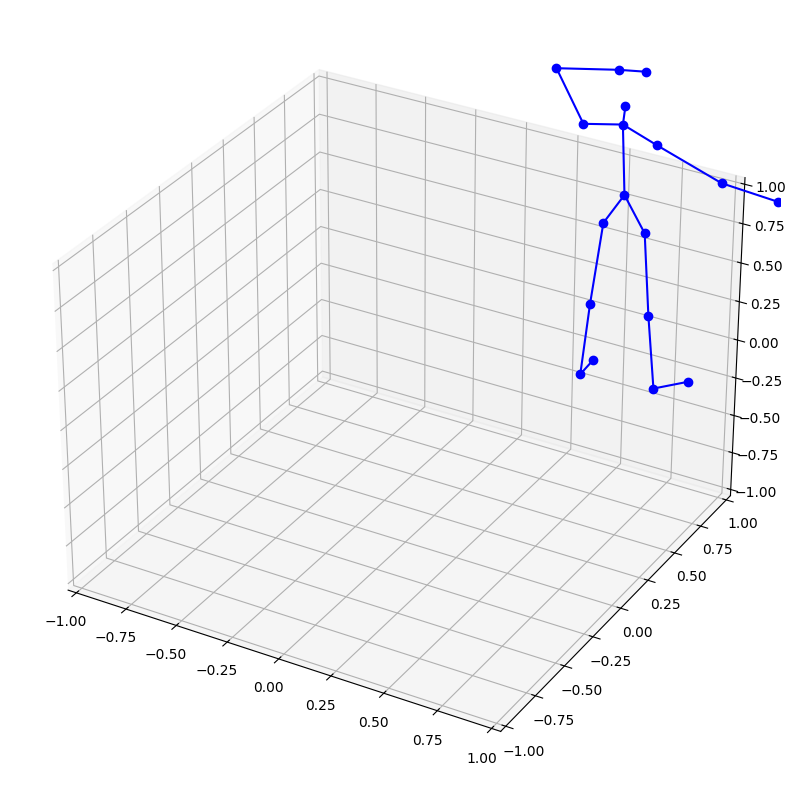

In [6]:
plot_3d_pose(generated_positions[1].reshape(19,3))

# Training a Neural Network

In [7]:
dataset = torch.tensor(generated_positions, dtype = torch.float64)

In [8]:
random_ts = torch.rand(dataset.size()[0])

In [9]:
#noised_positions = noise(dataset[0:3], 5*random_ts[0:3],bones_tensor)

In [10]:
bones_tensor = bones_tensor.to(torch.float64)

In [11]:
bones_tensor.requires_grad =False
dataset.requires_grad = True

In [12]:
def loss_test_wrapper(tensor):
    return loss_test(tensor,19*random_ts[0:2], bones_tensor)

In [13]:
loss_test(dataset[0:5],19*random_ts[0:5], bones_tensor)

tensor([-544.3751], dtype=torch.float64, grad_fn=<AddBackward0>)

In [14]:
torch.autograd.gradcheck(loss_test_wrapper, (dataset[0:2]))

True

In [15]:
#langdiff.train_net(dataset, bones_tensor)